# Movie Hackathon ETL Pipeline - Part 2

### Dependencies

In [1]:
%matplotlib inline

import datetime
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Wikipedia data

In [2]:
# Path to data directory
data_path = 'data/'

In [3]:
# Wikipedia movie data
wiki_movies_df = pd.read_pickle(data_path + 'wiki_movies.pkl')
print(wiki_movies_df.info())
wiki_movies_df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 6935
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Based on               2173 non-null   object        
 1   Release date           6867 non-null   datetime64[ns]
 2   Country                6674 non-null   object        
 3   Budget                 4712 non-null   float64       
 4   Box office             5449 non-null   float64       
 5   Cinematographer(s)     6249 non-null   object        
 6   Director               6894 non-null   object        
 7   Distributor            6591 non-null   object        
 8   Editor(s)              6409 non-null   object        
 9   Language(s)            6823 non-null   object        
 10  Composer(s)            6427 non-null   object        
 11  Producer(s)            6718 non-null   object        
 12  Production company(s)  5297 non-null   object        
 13  Dur

,Based on,Release date,Country,Budget,Box office,Cinematographer(s),Director,Distributor,Editor(s),Language(s),...,Producer(s),Production company(s),Duration,Writer(s),Stars,IMDB link,Title,URL,Year,ID
0,"[Characters, by Rex Weiner]",1990-07-11,United States,20000000.0,21400000.0,Oliver Wood,Renny Harlin,20th Century Fox,Michael Tronick,English,...,"[Steve Perry, Joel Silver]",Silver Pictures,102.0,"[David Arnott, James Cappe]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,tt0098987
1,"[the novel, After Dark, My Sweet, by, Jim Thom...",1990-05-17,United States,6000000.0,2700000.0,Mark Plummer,James Foley,Avenue Pictures,Howard E. Smith,English,...,"[Ric Kidney, Robert Redlin]",Avenue Pictures,114.0,"[James Foley, Robert Redlin]","[Jason Patric, Rachel Ward, Bruce Dern, George...",https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,tt0098994


### Kaggle data

In [4]:
# Kaggle movie metadata
kaggle_movies_df = pd.read_pickle(data_path + 'kaggle_movies.pkl')
print(kaggle_movies_df.info())
kaggle_movies_df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45408 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45408 non-null  int64         
 1   genres                45408 non-null  object        
 2   id                    45408 non-null  int64         
 3   imdb_id               45407 non-null  object        
 4   original_language     45397 non-null  object        
 5   original_title        45408 non-null  object        
 6   overview              44456 non-null  object        
 7   popularity            45405 non-null  float64       
 8   poster_path           45027 non-null  object        
 9   production_companies  45405 non-null  object        
 10  production_countries  45405 non-null  object        
 11  release_date          45325 non-null  datetime64[ns]
 12  revenue               45405 non-null  float64       
 13  runtime         

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0


In [5]:
# Kaggle movie metadata
kaggle_ratings_df = pd.read_pickle(data_path + 'kaggle_ratings.pkl')
print(kaggle_ratings_df.info(null_counts=True))
kaggle_ratings_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype         
---  ------     --------------     -----         
 0   userId     26024289 non-null  int64         
 1   movieId    26024289 non-null  int64         
 2   rating     26024289 non-null  float64       
 3   timestamp  26024289 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 794.2 MB
None


,userId,movieId,rating,timestamp
0,1,110,1.0,2015-03-09 22:52:09
1,1,147,4.5,2015-03-09 23:07:15


### Join movie data from both sources

In [6]:
movies_df = pd.merge(wiki_movies_df, kaggle_movies_df, left_on='ID', right_on='imdb_id', 
                     how='inner', suffixes=[' (Wiki)', '_kaggle'])
print(movies_df.info())
movies_df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 5982
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Based on               1966 non-null   object        
 1   Release date           5975 non-null   datetime64[ns]
 2   Country                5820 non-null   object        
 3   Budget                 4394 non-null   float64       
 4   Box office             5085 non-null   float64       
 5   Cinematographer(s)     5520 non-null   object        
 6   Director               5983 non-null   object        
 7   Distributor            5825 non-null   object        
 8   Editor(s)              5658 non-null   object        
 9   Language(s)            5930 non-null   object        
 10  Composer(s)            5664 non-null   object        
 11  Producer(s)            5879 non-null   object        
 12  Production company(s)  4738 non-null   object        
 13  Dur

,Based on,Release date,Country,Budget,Box office,Cinematographer(s),Director,Distributor,Editor(s),Language(s),...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,"[Characters, by Rex Weiner]",1990-07-11,United States,20000000.0,21400000.0,Oliver Wood,Renny Harlin,20th Century Fox,Michael Tronick,English,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-07-11,20423389.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,6.2,72.0
1,"[the novel, After Dark, My Sweet, by, Jim Thom...",1990-05-17,United States,6000000.0,2700000.0,Mark Plummer,James Foley,Avenue Pictures,Howard E. Smith,English,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-08-24,0.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",6.5,17.0


### Find redundant columns

In [7]:
# List of redundant column name pairs (wikipedia column, kaggle column)
redundant_cols = [
    ('ID', 'imdb_id'),
    ('Title', 'title'),
    ('Language(s)', 'original_language'),
    ('Production company(s)', 'production_companies'),
    ('Budget', 'budget'),
    ('Box office', 'revenue'),
    ('Duration', 'runtime'),
    ('Release date', 'release_date')
]

# Convert to df
redundant_cols = pd.DataFrame(redundant_cols, columns=['wikipedia', 'kaggle'])
redundant_cols['action'] = ''
redundant_cols

,wikipedia,kaggle,action
0,ID,imdb_id,
1,Title,title,
2,Language(s),original_language,
3,Production company(s),production_companies,
4,Budget,budget,
5,Box office,revenue,
6,Duration,runtime,
7,Release date,release_date,


In [8]:
# ID and imdb_id were the merge columns so drop the Wikipedia column
redundant_cols.loc[0, 'action'] = 'Drop wiki col'
redundant_cols

,wikipedia,kaggle,action
0,ID,imdb_id,Drop wiki col
1,Title,title,
2,Language(s),original_language,
3,Production company(s),production_companies,
4,Budget,budget,
5,Box office,revenue,
6,Duration,runtime,
7,Release date,release_date,


### Inspect title columns

In [9]:
# Extract title columns
title = movies_df[['Title', 'title']]

# Rows where titles are different between the 2 columns
print(title[title['Title'] != title['title']].shape[0])
title[title['Title'] != title['title']].head()

429


,Title,title
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
41,Delta Force 2,Delta Force 2: The Colombian Connection
47,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
68,The Godfather Part III,The Godfather: Part III


In [10]:
# Kaggle values look more descriptive
# Check for null titles the Kaggle column
title[(title['title'] == '') | (title['title'].isnull())].shape[0]

0

In [11]:
# Drop the Wikipedia column
redundant_cols.loc[1, 'action'] = 'Drop wiki col'
redundant_cols

,wikipedia,kaggle,action
0,ID,imdb_id,Drop wiki col
1,Title,title,Drop wiki col
2,Language(s),original_language,
3,Production company(s),production_companies,
4,Budget,budget,
5,Box office,revenue,
6,Duration,runtime,
7,Release date,release_date,


### Inspect language columns

In [12]:
# Extract language columns
lang = movies_df[['Language(s)', 'original_language']]

# Rows where languages are different between the 2 columns
print(lang[lang['Language(s)'] != lang['original_language']].shape[0])
lang[lang['Language(s)'] != lang['original_language']].head()

5983


,Language(s),original_language
0,English,en
1,English,en
2,"[English, Lao]",en
3,English,en
4,English,en


In [13]:
# Check Kaggle column values
lang['original_language'].unique()

array(['en', 'de', 'es', 'fr', 'it', 'zh', 'sv', 'ja', 'da', 'pt', 'hi',
       'ko', 'ab', 'tr', 'he', 'ar', 'cn', 'ru'], dtype=object)

In [14]:
# The Kaggle values are cleaner
# Check for null languages the Kaggle column
lang[(lang['original_language'] == '') | (lang['original_language'].isnull())].shape[0]

0

In [15]:
# Drop the Wikipedia column
redundant_cols.loc[2, 'action'] = 'Drop wiki col'
redundant_cols

,wikipedia,kaggle,action
0,ID,imdb_id,Drop wiki col
1,Title,title,Drop wiki col
2,Language(s),original_language,Drop wiki col
3,Production company(s),production_companies,
4,Budget,budget,
5,Box office,revenue,
6,Duration,runtime,
7,Release date,release_date,


### Inspect production company columns

In [16]:
# Extract production company columns
production = movies_df[['Production company(s)', 'production_companies']]

# Rows where values are different between the 2 columns
print(production[production['Production company(s)'] != production['production_companies']].shape[0])
production[production['Production company(s)'] != production['production_companies']].head()

5983


,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"


In [17]:
# Check Kaggle column values
production['production_companies'].unique()

array(["[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Silver Pictures', 'id': 1885}]",
       "[{'name': 'Avenue Pictures Productions', 'id': 251}]",
       "[{'name': 'IndieProd Company Productions', 'id': 959}, {'name': 'Carolco Pictures', 'id': 14723}]",
       ...,
       "[{'name': 'ARTE France Cinéma', 'id': 94}, {'name': 'Senator Film Produktion', 'id': 191}, {'name': 'Why Not Productions', 'id': 729}, {'name': 'Les Films Du Fleuve', 'id': 1926}, {'name': 'Non-Stop Productions', 'id': 5630}, {'name': 'Fetisoff Illusion', 'id': 90658}]",
       "[{'name': 'Film Science', 'id': 1976}, {'name': 'Syncopated Films', 'id': 20311}, {'name': 'Rough House Pictures', 'id': 20848}]",
       "[{'name': 'HanWay Films', 'id': 2395}, {'name': 'See-Saw Films', 'id': 7217}, {'name': 'Little Punk', 'id': 82010}]"],
      dtype=object)

In [18]:
# The Kaggle values are more descriptive
# Check for null production companies the Kaggle column
production[(production['production_companies'] == '') | (production['production_companies'].isnull())].shape[0]

0

In [19]:
# Drop the Wikipedia column
redundant_cols.loc[3, 'action'] = 'Drop wiki col'
redundant_cols

,wikipedia,kaggle,action
0,ID,imdb_id,Drop wiki col
1,Title,title,Drop wiki col
2,Language(s),original_language,Drop wiki col
3,Production company(s),production_companies,Drop wiki col
4,Budget,budget,
5,Box office,revenue,
6,Duration,runtime,
7,Release date,release_date,


### Inspect budget columns

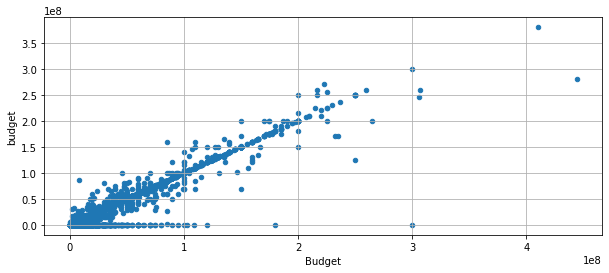

In [20]:
# Extract budget columns
budget = movies_df[['Budget', 'budget']]

# Scatterplot
budget.plot(kind='scatter', x='Budget', y='budget', figsize=(10, 4), grid=True)
plt.show()

In [21]:
# Budget column from Wikipedia has an outlier but Kaggle's budget column has more outliers
# Fill Kaggle's missing budget values with Wikipedia's budget values, then drop the Wikipedia column
redundant_cols.loc[4, 'action'] = 'Fill kaggle missing, drop wiki col'
redundant_cols

,wikipedia,kaggle,action
0,ID,imdb_id,Drop wiki col
1,Title,title,Drop wiki col
2,Language(s),original_language,Drop wiki col
3,Production company(s),production_companies,Drop wiki col
4,Budget,budget,"Fill kaggle missing, drop wiki col"
5,Box office,revenue,
6,Duration,runtime,
7,Release date,release_date,


### Inspect revenue columns

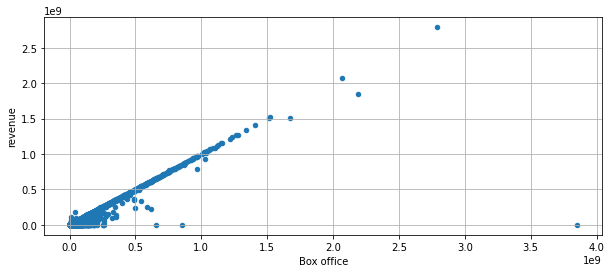

In [22]:
# Extract budget columns
revenue = movies_df[['Box office', 'revenue']]

# Scatterplot
revenue.plot(kind='scatter', x='Box office', y='revenue', figsize=(10, 4), grid=True)
plt.show()

In [23]:
# Do the same as budget column
redundant_cols.loc[5, 'action'] = 'Fill kaggle missing, drop wiki col'
redundant_cols

,wikipedia,kaggle,action
0,ID,imdb_id,Drop wiki col
1,Title,title,Drop wiki col
2,Language(s),original_language,Drop wiki col
3,Production company(s),production_companies,Drop wiki col
4,Budget,budget,"Fill kaggle missing, drop wiki col"
5,Box office,revenue,"Fill kaggle missing, drop wiki col"
6,Duration,runtime,
7,Release date,release_date,


### Inspect runtime columns

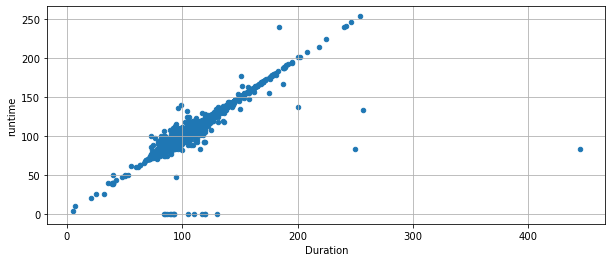

In [24]:
# Extract budget columns
run = movies_df[['Duration', 'runtime']]

# Scatterplot
run.plot(kind='scatter', x='Duration', y='runtime', figsize=(10, 4), grid=True)
plt.show()

In [25]:
# Do the same as budget column
redundant_cols.loc[6, 'action'] = 'Fill kaggle missing, drop wiki col'
redundant_cols

,wikipedia,kaggle,action
0,ID,imdb_id,Drop wiki col
1,Title,title,Drop wiki col
2,Language(s),original_language,Drop wiki col
3,Production company(s),production_companies,Drop wiki col
4,Budget,budget,"Fill kaggle missing, drop wiki col"
5,Box office,revenue,"Fill kaggle missing, drop wiki col"
6,Duration,runtime,"Fill kaggle missing, drop wiki col"
7,Release date,release_date,


### Inspect release date column

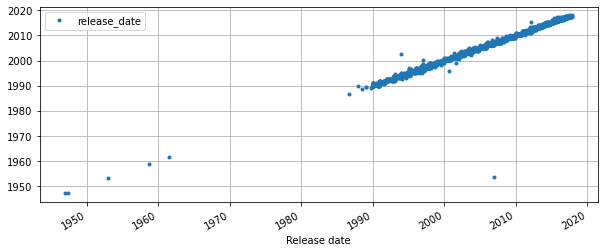

In [26]:
# Extract budget columns
release = movies_df[['Release date', 'release_date']]

# Scatterplot
release.plot(x='Release date', y='release_date', style='.', figsize=(10, 4), grid=True)
plt.show()

In [27]:
# Inspect outlier
movies_df.loc[(movies_df['Release date'] > '2000') & (movies_df['release_date'] < '2000'), 
              ['Title', 'title', 'Release date', 'release_date']]

,Title,title,Release date,release_date
1223,Without Evidence,Without Evidence,2000-09-12,1995-10-12
2159,Speedway Junky,Speedway Junky,2001-08-01,1999-02-11
2358,Things You Can Tell Just by Looking at Her,Things You Can Tell Just by Looking at Her,2000-01-22,1999-10-28
3586,The Holiday,From Here to Eternity,2006-12-08,1953-08-28


In [28]:
# Check for null dates the Kaggle column
release['release_date'].isnull().sum()

0

In [29]:
# Drop outlier and drop the Wikipedia column
redundant_cols.loc[7, 'action'] = 'Drop outlier, drop wiki col'
redundant_cols

,wikipedia,kaggle,action
0,ID,imdb_id,Drop wiki col
1,Title,title,Drop wiki col
2,Language(s),original_language,Drop wiki col
3,Production company(s),production_companies,Drop wiki col
4,Budget,budget,"Fill kaggle missing, drop wiki col"
5,Box office,revenue,"Fill kaggle missing, drop wiki col"
6,Duration,runtime,"Fill kaggle missing, drop wiki col"
7,Release date,release_date,"Drop outlier, drop wiki col"


### Drop redundant columns

In [30]:
# Drop `ID`, `Title`, `Language(s)`, and `Production company(s)`
movies_drop_cols1_df = movies_df.drop(['ID', 'Title', 'Language(s)', 'Production company(s)'], axis=1)

# Drop release date outlier then drop `Release date`
release_date_to_drop = movies_df[(movies_df['Release date'] > '2000') & (movies_df['release_date'] < '1960')].index
movies_drop_cols1_df.drop(release_date_to_drop, inplace=True)
movies_drop_cols1_df.drop('Release date', axis=1, inplace=True)
movies_drop_cols1_df.shape

(5982, 36)

In [31]:
def fill_kaggle_drop_wiki(kaggle_col, wiki_col, data=movies_drop_cols1_df):
    
    ''' Fill missing values in the Kaggle column using values in the Wikipedia column, then drop the Wikipedia column '''
    
    df = data.copy()
    
    def helper(row):
        cond1 = pd.isnull(row[kaggle_col]) or row[kaggle_col] == 0
        cond2 = not (pd.isnull(row[wiki_col]) or row[wiki_col] == 0)
        if cond1 and cond2:
            return row[wiki_col]
        return row[kaggle_col]
            
    df[kaggle_col] = df.apply(lambda row: helper(row), axis=1)
    return df.drop(wiki_col, axis=1)
    

# Fill `budget`, `revenue`, and `runtime` missing values, then drop `Budget`, `Box office`, `Duration`
movies_drop_cols2_df = fill_kaggle_drop_wiki('budget', 'Budget')
movies_drop_cols2_df = fill_kaggle_drop_wiki('revenue', 'Box office', movies_drop_cols2_df)
movies_drop_cols2_df = fill_kaggle_drop_wiki('runtime', 'Duration', movies_drop_cols2_df)
movies_drop_cols2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 5982
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Based on              1966 non-null   object        
 1   Country               5819 non-null   object        
 2   Cinematographer(s)    5519 non-null   object        
 3   Director              5982 non-null   object        
 4   Distributor           5824 non-null   object        
 5   Editor(s)             5657 non-null   object        
 6   Composer(s)           5663 non-null   object        
 7   Producer(s)           5878 non-null   object        
 8   Writer(s)             5854 non-null   object        
 9   Stars                 5877 non-null   object        
 10  IMDB link             5982 non-null   object        
 11  URL                   5982 non-null   object        
 12  Year                  5982 non-null   int64         
 13  budget            

### Rename and reorder columns

In [32]:
movies_drop_cols2_df.columns

Index(['Based on', 'Country', 'Cinematographer(s)', 'Director', 'Distributor',
       'Editor(s)', 'Composer(s)', 'Producer(s)', 'Writer(s)', 'Stars',
       'IMDB link', 'URL', 'Year', 'budget', 'genres', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [33]:
# Column order
col_order = ['id', 'imdb_id', 'IMDB link', 'URL', 'poster_path', 'title', 'original_title', 'tagline', 'Based on', 'overview',
             'release_date', 'Year', 'runtime', 'budget', 'revenue', 'popularity', 'vote_average', 'vote_count',
             'genres', 'status', 'Country', 'original_language', 'spoken_languages',
             'Writer(s)', 'Producer(s)', 'Director', 'Stars', 'Cinematographer(s)', 'Composer(s)', 'Editor(s)',
             'production_companies', 'production_countries', 'Distributor']

# New column names
col_names = ['kaggle_id', 'imdb_id', 'imdb_link', 'wikipedia_url', 'poster_path', 'title', 'original_title', 'tagline', 
             'based_on', 'overview', 'release_date', 'year', 'runtime', 'budget', 'revenue', 'popularity', 
             'vote_average', 'vote_count', 'genres', 'status', 'country', 'original_language', 'spoken_languages', 
             'writers', 'producers', 'director', 'stars', 'cinematographers', 'composers', 'editors', 
             'production_companies', 'production_countries', 'distributor']

# Rename and order columns
movies_rename_cols = movies_drop_cols2_df.rename({old: new for old, new in zip(col_order, col_names) if old != new}, axis=1)
movies_rename_cols = movies_rename_cols[col_names]
movies_rename_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 5982
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   kaggle_id             5982 non-null   int64         
 1   imdb_id               5982 non-null   object        
 2   imdb_link             5982 non-null   object        
 3   wikipedia_url         5982 non-null   object        
 4   poster_path           5981 non-null   object        
 5   title                 5982 non-null   object        
 6   original_title        5982 non-null   object        
 7   tagline               4880 non-null   object        
 8   based_on              1966 non-null   object        
 9   overview              5977 non-null   object        
 10  release_date          5982 non-null   datetime64[ns]
 11  year                  5982 non-null   int64         
 12  runtime               5982 non-null   float64       
 13  budget            

In [34]:
# Copy df
movies_df = movies_rename_cols.copy()
movies_df.head(2)

,kaggle_id,imdb_id,imdb_link,wikipedia_url,poster_path,title,original_title,tagline,based_on,overview,...,writers,producers,director,stars,cinematographers,composers,editors,production_companies,production_countries,distributor
0,9548,tt0098987,https://www.imdb.com/title/tt0098987/,https://en.wikipedia.org/wiki/The_Adventures_o...,/yLeX2QLkHeRlYQRcbU8BKgMaYYD.jpg,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,"[Characters, by Rex Weiner]","Ford ""Mr. Rock n' Roll Detective"" Fairlane is ...",...,"[David Arnott, James Cappe]","[Steve Perry, Joel Silver]",Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[Cliff Eidelman, Yello]",Michael Tronick,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox
1,25501,tt0098994,https://www.imdb.com/title/tt0098994/,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",/3hjcHNtWn9T6jVGXgNXyCsMWBdj.jpg,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,"[the novel, After Dark, My Sweet, by, Jim Thom...",The intriguing relationship between three desp...,...,"[James Foley, Robert Redlin]","[Ric Kidney, Robert Redlin]",James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Maurice Jarre,Howard E. Smith,"[{'name': 'Avenue Pictures Productions', 'id':...","[{'iso_3166_1': 'US', 'name': 'United States o...",Avenue Pictures


### Save data

In [35]:
movies_df.to_pickle(data_path + 'movies.pkl')
pd.read_pickle(data_path + 'movies.pkl').head(2)

,kaggle_id,imdb_id,imdb_link,wikipedia_url,poster_path,title,original_title,tagline,based_on,overview,...,writers,producers,director,stars,cinematographers,composers,editors,production_companies,production_countries,distributor
0,9548,tt0098987,https://www.imdb.com/title/tt0098987/,https://en.wikipedia.org/wiki/The_Adventures_o...,/yLeX2QLkHeRlYQRcbU8BKgMaYYD.jpg,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,"[Characters, by Rex Weiner]","Ford ""Mr. Rock n' Roll Detective"" Fairlane is ...",...,"[David Arnott, James Cappe]","[Steve Perry, Joel Silver]",Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[Cliff Eidelman, Yello]",Michael Tronick,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox
1,25501,tt0098994,https://www.imdb.com/title/tt0098994/,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",/3hjcHNtWn9T6jVGXgNXyCsMWBdj.jpg,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,"[the novel, After Dark, My Sweet, by, Jim Thom...",The intriguing relationship between three desp...,...,"[James Foley, Robert Redlin]","[Ric Kidney, Robert Redlin]",James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Maurice Jarre,Howard E. Smith,"[{'name': 'Avenue Pictures Productions', 'id':...","[{'iso_3166_1': 'US', 'name': 'United States o...",Avenue Pictures
